[1952.45613098 3460.41243744 4386.33722115 4950.33394814 5373.17061996]
32023.014754073054 3
[5599.95860291]


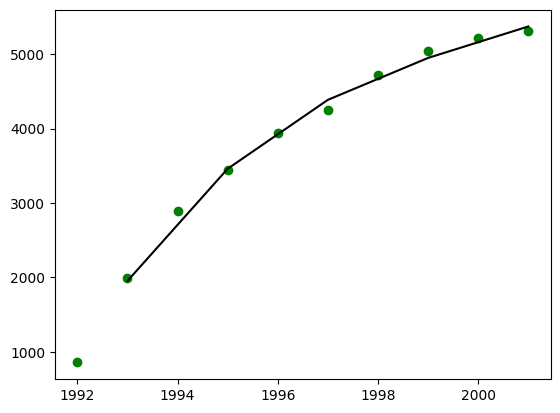

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

years=[1992,1993,1994,1995,1996,1997,1998,1999,2000,2001]
papers=[855, 1997, 2894, 3444, 3939, 4252, 4721, 5041, 5219, 5313]

# x_train=[1992,1994,1996,1998,2000]
# y_train=[855,2894,3939,4721,5219]

x_test=[1993,1995,1997,1999,2001]
y_test=[1997,3444,4252,5041,5313]
x_train=years
y_train=papers
min=500000000
for i in range(1,10):
    poly=PolynomialFeatures(degree=i)
    x_train_new=poly.fit_transform(np.array(x_train).reshape(-1,1))
    model=LinearRegression().fit(np.array(x_train_new),y_train)
    ypreds=model.predict(poly.fit_transform(np.array(x_test).reshape(-1,1)))
    biases2=[]
    for j in range(0,len(y_test)):
        biases2.append((ypreds[j]-y_test[j])**2)
    if(min>sum(biases2)):
        min=sum(biases2)
        min_val=i
    if(i==4):
        # print('m')
        print(ypreds)
print(min,min_val)

poly=PolynomialFeatures(degree=min_val)
x_train_new=poly.fit_transform(np.array(x_train).reshape(-1,1))
model=LinearRegression().fit(np.array(x_train_new),y_train)
final_pred=model.predict(poly.fit_transform(np.array([2002]).reshape(-1,1)))
print(final_pred)

plt.scatter(x_train,y_train,color='g')
plt.plot(x_test,ypreds,color='k')
plt.show()
